In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from importlib import reload

import sys
sys.path.insert(1,'C:/Users/Sole/Documents/Udemy/feature_engine/feature_engine')

import missing_data_imputers as msi

In [2]:
def load_houseprice():
    data = pd.read_csv('houseprice.csv')
    return data

In [3]:
data = load_houseprice()
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
var_with_nulls = [x for x in data.columns if data[x].isnull().sum()>0]

data[var_with_nulls].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
data[var_with_nulls].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [6]:
data[var_with_nulls].head(10)

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
5,85.0,NaN,None,0.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,1993.0,Unf,TA,TA,NaN,MnPrv,Shed
6,75.0,NaN,Stone,186.0,Ex,TA,Av,GLQ,Unf,SBrkr,Gd,Attchd,2004.0,RFn,TA,TA,NaN,NaN,NaN
7,NaN,NaN,Stone,240.0,Gd,TA,Mn,ALQ,BLQ,SBrkr,TA,Attchd,1973.0,RFn,TA,TA,NaN,NaN,Shed
8,51.0,NaN,None,0.0,TA,TA,No,Unf,Unf,FuseF,TA,Detchd,1931.0,Unf,Fa,TA,NaN,NaN,NaN
9,50.0,NaN,None,0.0,TA,TA,No,GLQ,Unf,SBrkr,TA,Attchd,1939.0,RFn,Gd,TA,NaN,NaN,NaN


### MeanMedianImputer

In [10]:
reload(msi)

<module 'missing_data_imputers' from 'C:/Users/Sole/Documents/Udemy/feature_engine/feature_engine\\missing_data_imputers.py'>

In [7]:
median_imputer = msi.MeanMedianImputer(imputation_method='median', variables = ['LotFrontage', 'MasVnrArea'])
median_imputer.fit(data)

MeanMedianImputer(imputation_method='median',
         variables=['LotFrontage', 'MasVnrArea'])

In [8]:
median_imputer.imputer_dict_

{'LotFrontage': 69.0, 'MasVnrArea': 0.0}

In [9]:
data[['LotFrontage', 'MasVnrArea']].median()

LotFrontage    69.0
MasVnrArea      0.0
dtype: float64

In [10]:
data_tf = median_imputer.transform(data)
data_tf[['LotFrontage', 'MasVnrArea']].isnull().sum()

LotFrontage    0
MasVnrArea     0
dtype: int64

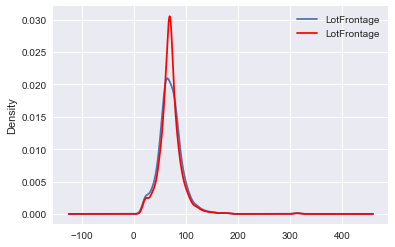

In [11]:
# we can see that the distribution has changed slightly with now more values accumulating towards the median
fig = plt.figure()
ax = fig.add_subplot(111)
data['LotFrontage'].plot(kind='kde', ax=ax)
data_tf['LotFrontage'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## EndTailImputer

In [12]:
data = load_houseprice()

In [13]:
tail_imputer = msi.EndTailImputer(distribution='gaussian', tail='right',
                                    fold=3, variables = ['LotFrontage', 'MasVnrArea'])
tail_imputer.fit(data)

EndTailImputer(distribution='gaussian', fold=3, tail='right',
        variables=['LotFrontage', 'MasVnrArea'])

In [14]:
tail_imputer.imputer_dict_

{'LotFrontage': 142.9042136914762, 'MasVnrArea': 646.88388146964348}

In [15]:
tail_imputer = msi.EndTailImputer(distribution='skewed', tail='left',
                                    fold=3, variables = ['LotFrontage', 'MasVnrArea'])
tail_imputer.fit(data)

EndTailImputer(distribution='skewed', fold=3, tail='left',
        variables=['LotFrontage', 'MasVnrArea'])

In [16]:
tail_imputer.imputer_dict_

{'LotFrontage': -4.0, 'MasVnrArea': -498.0}

In [17]:
data_tf = tail_imputer.transform(data)
data_tf[['LotFrontage', 'MasVnrArea']].isnull().sum()

LotFrontage    0
MasVnrArea     0
dtype: int64

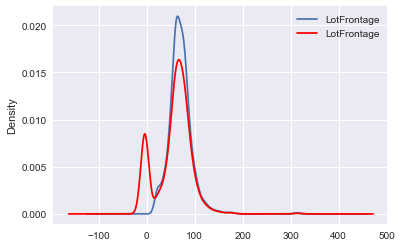

In [18]:
# we can see that the distribution has changed slightly with now more values
#  accumulating towards the  left tail
fig = plt.figure()
ax = fig.add_subplot(111)
data['LotFrontage'].plot(kind='kde', ax=ax)
data_tf['LotFrontage'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## AddMissingLabelCategoricalImputer

In [31]:
data = load_houseprice()

In [32]:
data[['Alley', 'MasVnrType']].isnull().mean()

Alley         0.937671
MasVnrType    0.005479
dtype: float64

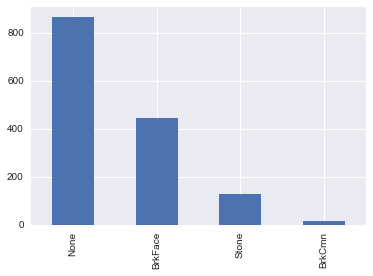

In [34]:
data['MasVnrType'].value_counts().plot.bar()

In [37]:
reload(msi)

<module 'missing_data_imputers' from 'C:/Users/Sole/Documents/Udemy/feature_engine/feature_engine\\missing_data_imputers.py'>

In [38]:
addLabel_imputer = msi.AddMissingLabelCategoricalImputer(variables = ['Alley', 'MasVnrType'])
addLabel_imputer.fit(data)

AddMissingLabelCategoricalImputer(variables=['Alley', 'MasVnrType'])

In [41]:
data_tf = addLabel_imputer.transform(data)

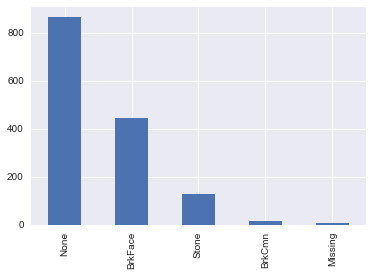

In [42]:
data_tf['MasVnrType'].value_counts().plot.bar()

## FrequentCategoryImputer

In [43]:
data = load_houseprice()

In [44]:
data['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [46]:
data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [48]:
frequentLabel_imputer = msi.FrequentCategoryImputer(variables = ['Alley', 'MasVnrType'])
frequentLabel_imputer.fit(data)

FrequentCategoryImputer(variables=['Alley', 'MasVnrType'])

In [50]:
frequentLabel_imputer.imputer_dict_

{'Alley': 'Grvl', 'MasVnrType': 'None'}

In [51]:
data = frequentLabel_imputer.transform(data)
data['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

## RandomSampleImputer

In [19]:
data = load_houseprice()
data[['Alley', 'MasVnrType', 'LotFrontage', 'MasVnrArea']].isnull().mean()

Alley          0.937671
MasVnrType     0.005479
LotFrontage    0.177397
MasVnrArea     0.005479
dtype: float64

In [20]:
reload(msi)

<module 'missing_data_imputers' from 'C:/Users/Sole/Documents/Udemy/feature_engine/feature_engine\\missing_data_imputers.py'>

In [21]:
random_imputer = msi.RandomSampleImputer(variables = ['Alley', 'MasVnrType', 'LotFrontage', 'MasVnrArea'])
random_imputer.fit(data)

RandomSampleImputer(variables=['Alley', 'MasVnrType', 'LotFrontage', 'MasVnrArea'])

In [22]:
random_imputer.X.head()

,Alley,MasVnrType,LotFrontage,MasVnrArea
0,NaN,BrkFace,65.0,196.0
1,NaN,None,80.0,0.0
2,NaN,BrkFace,68.0,162.0
3,NaN,None,60.0,0.0
4,NaN,BrkFace,84.0,350.0


In [23]:
random_state = 29
data_tf = random_imputer.transform(data)

In [24]:
data_tf[['Alley', 'MasVnrType', 'LotFrontage', 'MasVnrArea']].isnull().mean()

Alley          0.0
MasVnrType     0.0
LotFrontage    0.0
MasVnrArea     0.0
dtype: float64

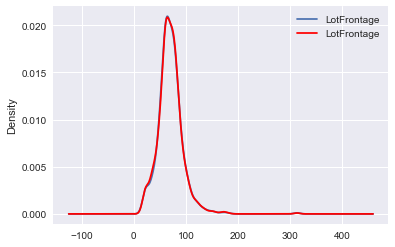

In [25]:
# we can see that the distribution has changed slightly with now more values accumulating towards the median
fig = plt.figure()
ax = fig.add_subplot(111)
data['LotFrontage'].plot(kind='kde', ax=ax)
data_tf['LotFrontage'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## AddNaNBinaryImputer

In [66]:
data = load_houseprice()
data[['Alley', 'MasVnrType', 'LotFrontage', 'MasVnrArea']].isnull().mean()

Alley          0.937671
MasVnrType     0.005479
LotFrontage    0.177397
MasVnrArea     0.005479
dtype: float64

In [68]:
addBinary_imputer = msi.AddNaNBinaryImputer(variables = ['Alley', 'MasVnrType', 'LotFrontage', 'MasVnrArea'])
addBinary_imputer.fit(data)

AddNaNBinaryImputer(variables=['Alley', 'MasVnrType', 'LotFrontage', 'MasVnrArea'])

In [69]:
data = addBinary_imputer.transform(data)
data[['Alley_na', 'MasVnrType_na', 'LotFrontage_na', 'MasVnrArea_na']].head()

,Alley_na,MasVnrType_na,LotFrontage_na,MasVnrArea_na
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [70]:
data[['Alley_na', 'MasVnrType_na', 'LotFrontage_na', 'MasVnrArea_na']].mean()

Alley_na          0.937671
MasVnrType_na     0.005479
LotFrontage_na    0.177397
MasVnrArea_na     0.005479
dtype: float64

## ArbitraryNumberImputer

In [26]:
data = load_houseprice()
data[['LotFrontage', 'MasVnrArea']].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
dtype: float64

In [27]:
reload(msi)

<module 'missing_data_imputers' from 'C:/Users/Sole/Documents/Udemy/feature_engine/feature_engine\\missing_data_imputers.py'>

In [28]:
arbitrary_imputer = msi.ArbitraryNumberImputer(arbitrary_number = -999, variables = ['LotFrontage', 'MasVnrArea'])
arbitrary_imputer.fit(data)

ArbitraryNumberImputer(arbitrary_number=-999,
            variables=['LotFrontage', 'MasVnrArea'])

In [29]:
data_tf = arbitrary_imputer.transform(data)
data_tf[['LotFrontage', 'MasVnrArea']].min()

LotFrontage   -999.0
MasVnrArea    -999.0
dtype: float64

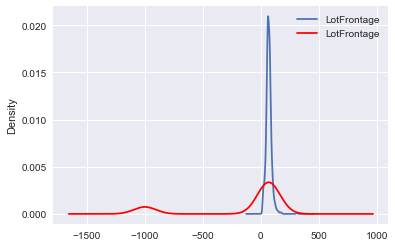

In [30]:
# we can see that the distribution has changed slightly with now more values accumulating towards the median
fig = plt.figure()
ax = fig.add_subplot(111)
data['LotFrontage'].plot(kind='kde', ax=ax)
data_tf['LotFrontage'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')